Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [115]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()
def read_csv_file(file_name):
    with open(file_name, 'rb') as f:
     reader = unicodecsv.DictReader(f)
     return list(reader)

#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
enrollments = read_csv_file('enrollments.csv')
daily_engagement = read_csv_file("daily_engagement.csv")
project_submissions = read_csv_file("project_submissions.csv")
print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


## Fixing Data Types

In [116]:
from datetime import datetime as dt
    
# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [117]:
# Clean up the data types in the engagement table
# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    engagement_record['has_visited']=1 if(engagement_record['num_courses_visited']>0) else 0 
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('has_visited', 1)])

In [118]:
# Clean up the data types in the enrollment table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
print(enrollments[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])


In [119]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])
print(project_submissions[0])

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

## Problems in the Data

In [120]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct'] 
print (daily_engagement[0]['account_key'])

## Rename the "acct" column in the daily_engagement table to "account_key".

0


## Missing Engagement Records

In [121]:
def find_unique(input_list):
    unique=set()
    for entry in input_list:
        unique.add(entry["account_key"])
    return unique    

In [122]:
unique_engagements=find_unique(daily_engagement)
for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_engagements and enrollment['join_date']!=enrollment['cancel_date']:
       print(enrollment)
print("Unique enrolments",len(unique_engagements))        
print (len(daily_engagement))

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
Unique enrolments 1237
136240


## Checking for More Problem Records

In [123]:
unique_engagements=find_unique(daily_engagement)
for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_engagements and enrollment['join_date']!=enrollment['cancel_date']:
       print(enrollment)
print("Unique enrolments",len(unique_engagements))        
print (len(daily_engagement))
print (daily_engagement[0]['account_key'])

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
Unique enrolments 1237
136240
0


## Tracking Down the Remaining Problems

In [124]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [125]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [126]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [127]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students ={}
for enrollment in non_udacity_enrollments:
 if not enrollment['is_canceled'] or enrollment['days_to_cancel']>7:
    account_key=enrollment['account_key']
    join_date=enrollment['join_date']
    if account_key not in paid_students or join_date>paid_students[account_key]:
       paid_students[account_key]=join_date;
print(len(paid_students))    


995


## Getting Data from First Week

In [128]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0

In [129]:
#####################################

def remove_cancelations_during_free_trail(datalist):
    data=[]
    for entry in datalist:
        if entry['account_key'] in paid_students:
            data.append(entry)
    return data;   

paid_enrollments=remove_cancelations_during_free_trail(non_udacity_enrollments)
paid_engaements=remove_cancelations_during_free_trail(non_udacity_engagement)
paid_submissions=remove_cancelations_during_free_trail(non_udacity_submissions)

print(paid_engaements[0])

paid_engagement_in_first_week = []
for paid_engaement in paid_engaements:
    account_key=paid_engaement['account_key']
    engagement_date=paid_engaement['utc_date']
    joining_date=paid_students[account_key]
    if within_one_week(joining_date,engagement_date):
        paid_engagement_in_first_week.append(paid_engaement) 
        

#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
len(paid_engagement_in_first_week)

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1), ('account_key', '0')])


6919

## Exploring Student Engagement

In [130]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [131]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
def groupBy(entry_list,key):
    entry_dict=defaultdict(list)
    for entry in entry_list:
        entry_dict[entry['account_key']].append(entry[key])
    return entry_dict
        
def sumByValue(entry_dict):
    value_sum_dict={}
    for account_key, entry in entry_dict.items():
        total=0
        for record in entry:
            total += record
        value_sum_dict[account_key]=total    
    return value_sum_dict        
            
by_lesson_comleted=sumByValue(groupBy(paid_engagement_in_first_week,'lessons_completed'))

In [132]:
import numpy as np

# Summarize the data about minutes spent in the classroom

def print_stats(input_list):
    print('Mean:', np.mean(input_list))
    print('Standard deviation:', np.std(input_list))
    print('Minimum:', np.min(input_list))
    print('Maximum:', np.max(input_list))

## Debugging Data Analysis Code

In [133]:



## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## Lessons Completed in First Week

In [134]:
by_total_minutes=sumByValue(groupBy(paid_engagement_in_first_week,'total_minutes_visited'))
print("Stats on lesson completed")   
print_stats(list(by_lesson_comleted.values()))

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

Stats on lesson completed
Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [135]:
paid_engagement_in_first_week[0]
by_number_of_class_visits=sumByValue(groupBy(paid_engagement_in_first_week,'has_visited'))
print_stats(list(by_number_of_class_visits.values()))
## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [136]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
passing_engagement =list()
non_passing_engagement =list()
print(paid_engaements[0])

passed_students=set()
subway_project_lesson_keys = ['746169184', '3176718735']
for submission in paid_submissions:
    if((submission['lesson_key'] in subway_project_lesson_keys) and 
      (submission['assigned_rating']=='PASSED' or submission['assigned_rating']=='DISTINCTION')):
        passed_students.add(submission['account_key'])
print(len(passed_students))      

for engagement in paid_engagement_in_first_week:
    if(engagement['account_key'] in passed_students):
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
print(len(passing_engagement))    
print(len(non_passing_engagement))    

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1), ('account_key', '0')])
647
4527
2392


## Comparing the Two Student Groups

In [137]:
######################################
print("################################Passing engagement########################")
print("##by_lesson_completed")
by_lesson_completed=sumByValue(groupBy(passing_engagement,'lessons_completed'))
print_stats(list(by_lesson_completed.values()))

print("##classes visited")
by_number_of_course_visits=sumByValue(groupBy(passing_engagement,'has_visited'))
print_stats(list(by_number_of_course_visits.values()))

print("##total_minutes_visited")
by_total_minutes_visited=sumByValue(groupBy(passing_engagement,'total_minutes_visited'))
print_stats(list(by_total_minutes_visited.values()))

print("################################NON Passing engagement########################")

print("##by_lesson_completed")
by_lesson_completed=sumByValue(groupBy(non_passing_engagement,'lessons_completed'))
print_stats(list(by_lesson_completed.values()))

print("##classes visited")
by_number_of_course_visits=sumByValue(groupBy(non_passing_engagement,'has_visited'))
print_stats(list(by_number_of_course_visits.values()))

print("##total_minutes_visited")
by_total_minutes_visited=sumByValue(groupBy(non_passing_engagement,'total_minutes_visited'))
print_stats(list(by_total_minutes_visited.values()))

######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

################################Passing engagement########################
##by_lesson_completed
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36
##classes visited
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7
##total_minutes_visited
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
################################NON Passing engagement########################
##by_lesson_completed
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
##classes visited
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7
##total_minutes_visited
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


## Making Histograms

##by_lesson_completed


(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

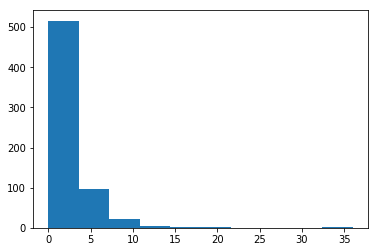

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
print("##by_lesson_completed")
by_lesson_completed=sumByValue(groupBy(passing_engagement,'lessons_completed'))
plt.hist(list(by_lesson_completed.values()))


################################Non Passing engagement########################
##by_lesson_completed


(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

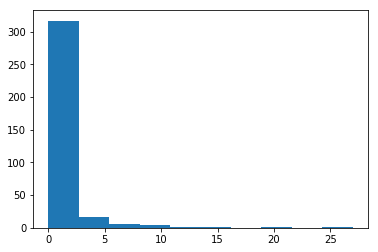

In [139]:
print("################################Non Passing engagement########################")
print("##by_lesson_completed")
by_lesson_completed=sumByValue(groupBy(non_passing_engagement,'lessons_completed'))
plt.hist(list(by_lesson_completed.values()))

################################ Passing engagement########################
##classes visited


(array([87., 82., 79.,  0., 91., 77.,  0., 85., 78., 68.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

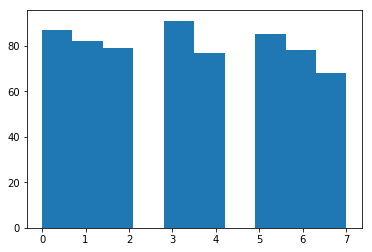

In [140]:
print("################################ Passing engagement########################")
print("##classes visited")
by_number_of_course_visits=sumByValue(groupBy(passing_engagement,'has_visited'))
plt.hist(list(by_number_of_course_visits.values()))

##classes visited


(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

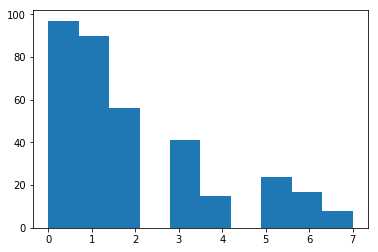

In [141]:
print("##classes visited")
by_number_of_course_visits=sumByValue(groupBy(non_passing_engagement,'has_visited'))
plt.hist(list(by_number_of_course_visits.values()))

##total_minutes_visited


(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 10 Patch objects>)

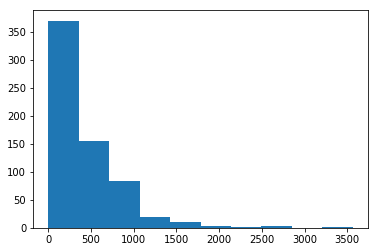

In [142]:
######################################
print("##total_minutes_visited")
by_total_minutes_visited=sumByValue(groupBy(passing_engagement,'total_minutes_visited'))
plt.hist(list(by_total_minutes_visited.values()))

######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

##total_minutes_visited


Text(0.5,1,'Total minutes visited by students who competed the course')

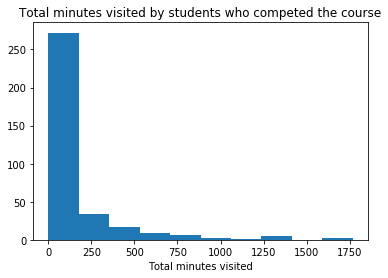

In [146]:
import seaborn as sns
print("##total_minutes_visited")
by_total_minutes_visited=sumByValue(groupBy(non_passing_engagement,'total_minutes_visited'))
plt.hist(list(by_total_minutes_visited.values()))
plt.xlabel("Total minutes visited")
plt.title("Total minutes visited by students who competed the course")


## Improving Plots and Sharing Findings

In [144]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.